## Breast Cancer Prediction Using Logistic Regression, Decision Tree and KNN

Now days, breast cancer is the most frequently diagnosed life-threatening cancer in women and the leading cause of cancer death among women. Breast cancer is the most common cause of cancer in women and the second most common cause of cancer death in women in the world.Breast cancer refers to cancers originating from breast tissue, most commonly from the inner lining of milk ducts or the lobules that supply the ducts with milk.

Classification modeling of breast cancer data:
Here, we are creating some classifiers that can help diagnose patients and predict the likelihood of a breast cancer.

The Models that we will be using here to find out the accuracy and prediction of the data are as follows:
    1. Logistic Regression
    2. Decision Tree
    3. KNearestNeighbours (KNN)

Data dictionary:

1.Diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign)
2.Mean_radius: mean of distances from center to points on the perimeter
3.Mean_texture: standard deviation of gray-scale values
4.Mean_perimeter: mean size of the core tumor
5.Mean_area
6.Mean_smoothness: mean of local variation in radius lengths


Data used:

https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset


# Exploratory analysis

Load the dataset and do some quick exploratory analysis.


In [1]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [2]:
#Importing the data

df = pd.read_csv(r'C:\Users\chand\Downloads\56485_108594_bundle_archive.zip')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.shape

(569, 6)

In [5]:
#Checking the shape of the dataset
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  569
Number of columns:  6


In [6]:
#Checking the total number of datapoints
print('The total size of the dataset: {}'.format(df.size))

The total size of the dataset: 3414


In [7]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Observation:

From the info() function, we have found that
There are 569 records present in the dataset.
There are 6 columns in the dataset
No missing values has been found so far in the dataset, all are non-null
5 columns are found to be float type and 1 coulmn found to be int type.
Total memory usage for the dataset is more than 26.8 kb

In [8]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [9]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

There is not any null values in the dataset

In [10]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


The description shows the mean values of various parameters

In [11]:
df.duplicated().any()

False

Observation: 
We can see that there is no duplicate records present in the dataset. And also there is no missing values.

# Distribution of classes( Malignant and Benign) in the dataset through bargraph

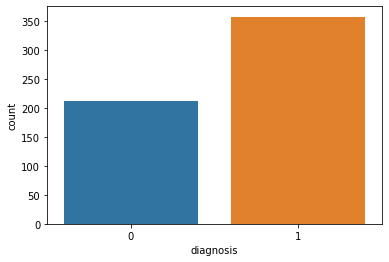

In [12]:
import seaborn as sns
sns.countplot(data=df,x="diagnosis")

The above barplot shows that more people are diagnosed with malignant breast tissues

In [13]:
print(df.groupby('diagnosis').size())

diagnosis
0    212
1    357
dtype: int64


Here, total Benign(0) diagnosis is 212 and Total Malignant (1) diagnosis is 357
Target variable/ class

The main motive of our predictor is to correctly predict on the basis of the data available, if the breast cancer is

    Malignant(1) i.e. Harmful ,or
    Benign(0) i.e. Not Harmful.

Hence, our target class is Diagnosis

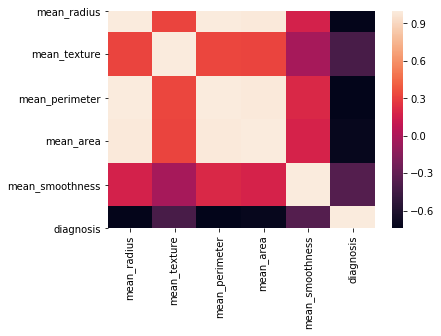

In [14]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [15]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


The above counts shows that there are strong correlation between mean_perimeter and mean_radius, mean_area and mean_radius and mean_area and mean_perimeter

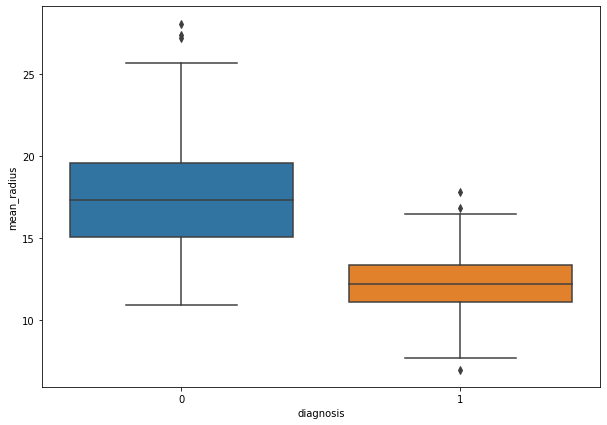

In [16]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "diagnosis", y = "mean_radius", data = df)

average radius of a tumor by diagnosis via a box plot. It shows that the malignant cases mean radius lies between the range of 10-15. 

In [17]:
# calculate the average radius size by diagnosis (0 or 1)
df.groupby('diagnosis')["mean_radius"].mean()

diagnosis
0    17.462830
1    12.146524
Name: mean_radius, dtype: float64

This is interpreted as…

“Women who are not diagnosed with breast cancer have an average/mean tumor radius size of 12.34.”

“Women who are diagnosed with breast cancer have an average/mean tumor radius size of 17.89.”

Now that we have found our average tumor radius by diagnosis, let’s impute them into our missing (aka our null) values.

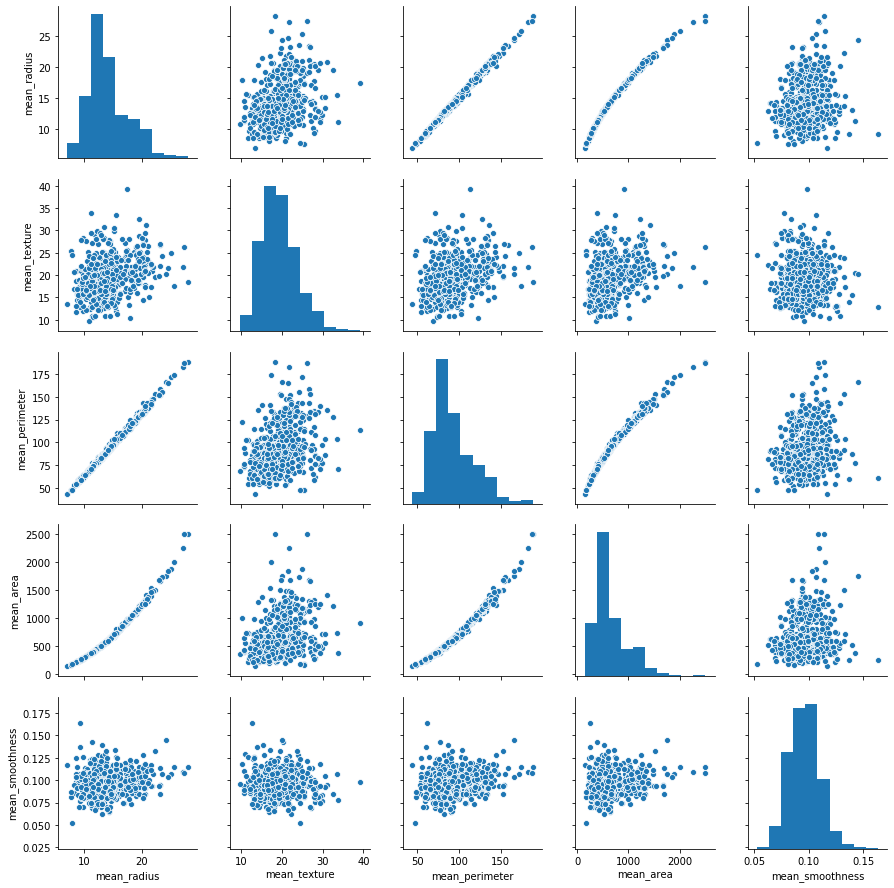

In [18]:
dff = sns.pairplot(df.drop('diagnosis', axis = 1))

Here shows that mean_perimeterm, mean_radius and mean_area shows multicolinearity.

In [19]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Building the model:
Spliting the data into Test data and Train data.We will set the test size to 0.25; i.e., 75% of the data will be assigned to the training set, and the remaining 25% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 21.

Y- Diagnosis
X- features (radius_mean, area_se, ....) 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 5), (143, 5), (426,), (143,))

# Logistic Regression Analysis: 
Logistic Regression is widely used for Discrete data. Here we will use the logistic regression analysis because the data is a Binary one. i.e (1,0) classification. 1 - Malignant and 0 - Benign

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.metrics import accuracy_score

In [25]:
logr = model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
logr.score(X_train,y_train)

0.9014084507042254

In [27]:
model.intercept_

array([0.63191237])

In [28]:
model.coef_

array([[ 4.27784419, -0.14786399, -0.46240684, -0.0242536 , -0.25143669]])

PREDICTION

In [29]:
y_pred = model.predict(X_test)

In [30]:
X_test['actuals'] = y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
X_test['pred'] = y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
X_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,actuals,pred
413,14.990,22.11,97.53,693.7,0.08515,1,0
334,12.300,19.02,77.88,464.4,0.08313,1,1
152,9.731,15.34,63.78,300.2,0.10720,1,1
202,23.290,26.67,158.90,1685.0,0.11410,0,0
109,11.340,21.26,72.48,396.5,0.08759,1,1


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test,X_test['pred'])

array([[43,  5],
       [ 5, 90]], dtype=int64)

In [35]:
print(classification_report(y_test,X_test['pred']))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        48
           1       0.95      0.95      0.95        95

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



# Conclusion

We had 143 women in our test set. Out of the 143, 54 women predicted to not have breast cancer,while 89 are classified to have breast cancer. The confusion matrix showws that 12 women were classified as not having breast cancer when they actually did (Type I error). Out of the 89 women predicted to have breast cancer, 1 was classified as having breast cancer when they did not (Type II error). In a nut shell, our model was more or less 91% accurate.

# Decision Tree

In [36]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

In [37]:
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

In [38]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [39]:
model1 = clf_gini.fit(X,y) 

In [40]:
y_pred_gini = model1.predict(X)

In [41]:
confusion_matrix(y,y_pred_gini)

array([[185,  27],
       [ 16, 341]], dtype=int64)

In [42]:
print(classification_report(y,y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       212
           1       0.93      0.96      0.94       357

    accuracy                           0.92       569
   macro avg       0.92      0.91      0.92       569
weighted avg       0.92      0.92      0.92       569



# Conclusion

We had 569 women in our decision tree set. Out of the 569, 212 women are predicted to not have breast cancer, while 357 are classified to have breast cancer. The confusion matrix showws that 27 women are classified as not having breast cancer when they actually did (Type I error). Out of the 357 women predicted to have breast cancer, 16 are classified to have breast cancer when they did not (Type II error). In a nut shell, our model was more or less 92% accurate.

# Binary classification using K Nearest Neighbours

KNN Algorithm is based on feature similarity, i.e how closely out-of-sample features resemble our training set determines how we classify a given data point.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [100]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(predict,y_test)
print(accuracy_score)



<function accuracy_score at 0x000002040D04FC18>


In [101]:
model.score(X_test,y_test)

0.8713450292397661

In [102]:
accuracy=model.score(X_train,y_train)
print("Accuracy score using KNN:", accuracy*100)

Accuracy score using KNN: 90.20100502512562


In [94]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [95]:
y_pred = model.predict(X_test)

In [96]:
confusion_matrix(y_test,y_pred)

array([[39, 14],
       [ 6, 84]], dtype=int64)

In [97]:
#import classification_report
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        53
           1       0.86      0.93      0.89        90

    accuracy                           0.86       143
   macro avg       0.86      0.83      0.84       143
weighted avg       0.86      0.86      0.86       143



# Conclusion
We had 171 women in our KNN Test set. Out of the 171, 64 women are predicted to not have breast cancer, while 107 are classified to have breast cancer. The confusion matrix shows that 12 women are classified as not having breast cancer when they actually did (Type I error). Out of the 107 women predicted to have breast cancer, 6 are classified to have breast cancer when they did not (Type II error). In a nut shell, our model was more or less 90% accurate.

# Scores on Malignant cases from each model are summarized as below: